In [155]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
from brian2.units import *
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML

In [156]:
data = np.load("../../synaptogenesis/structural_results_stdp_031546_02072017.npz")

In [157]:
data

In [158]:
simtime = int(data['simtime'])

In [159]:
pre_spikes = data['pre_spikes']
post_spikes = data['post_spikes']

In [58]:
pre_spikes = pre_spikes[:, :].astype(dtype=np.int32)
post_spikes = post_spikes[:, :].astype(dtype=np.int32)

In [59]:
pre_spikes_times = np.zeros((16,16,simtime))
post_spikes_times = np.zeros((16,16,simtime))

In [60]:
for id, time in pre_spikes:
    pre_spikes_times[id/16, id%16, time] = 1
for id, time in post_spikes:
    post_spikes_times[id/16, id%16, time] = 1    

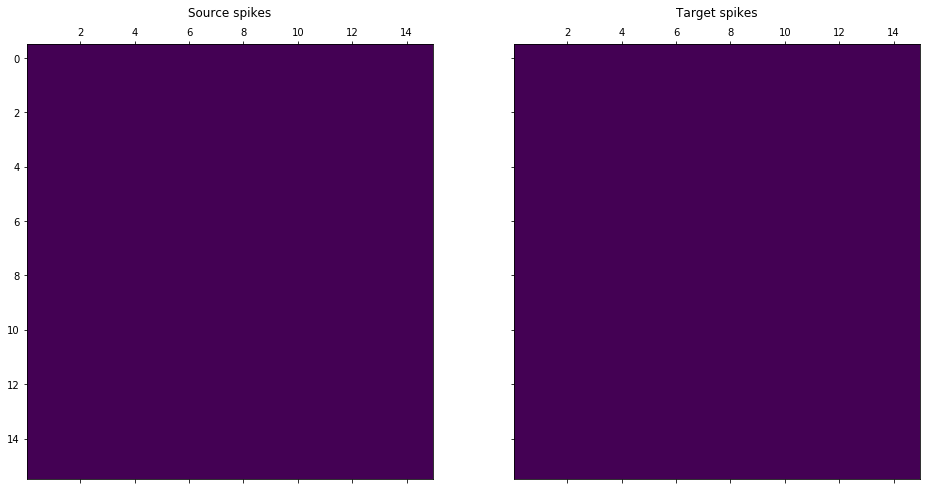

In [442]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    
pre_image = np.zeros((16,16))
post_image = np.zeros((16,16))
source_ax = ax1.matshow(pre_image, vmin=0, vmax=110)
target_ax = ax2.matshow(post_image, vmin=0, vmax=140)

ax1.set_title("Source spikes")
ax2.set_title("Target spikes")

In [443]:
def init():
    global pre_image, post_image
#     line.set_data(input_rates/Hz)
    source_ax.set_data(np.zeros((16,16)))
    target_ax.set_data(np.zeros((16,16)))
    pre_image = np.zeros((16,16))
    post_image = np.zeros((16,16))
    return (source_ax, target_ax, )

In [444]:
def animate(i):
    global pre_image, post_image, pre_spikes_times, post_spikes_times
    
    pre_image += pre_spikes_times[0:16, 0:16, i] * 100
    post_image += post_spikes_times[0:16, 0:16, i] * 100
            
    source_ax.set_data(pre_image)
    target_ax.set_data(post_image)
    pre_image *= .8
    post_image *= .8
    return (source_ax,target_ax,)

In [445]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10000, interval=60, blit=True)

In [244]:
HTML(anim.to_html5_video())

MemoryError: 

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=24, metadata=dict(artist='Petrut A Bogdan'), bitrate=-1)

In [446]:
anim.save('nicer_network_activity_10s.mp4', writer=writer)

TODO 

Analyse whether most spikes happen around the area of the input (0, 10) and less in the centre

Run experiment with 256 poisson spikes (more in centre, less on the edge

Plot weight changes over time (256x256 matrix)

Reduce fps when saving files

In [71]:
# Where are spikes happening most often?
post_count = np.zeros((16,16))
post_count = np.count_nonzero(post_spikes_times[0:16, 0:16, :], axis=2)

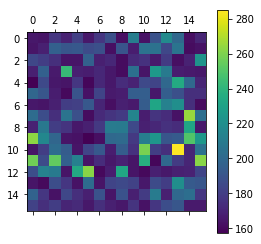

In [72]:
plt.matshow(post_count, fignum=180)
plt.grid(visible=False)
plt.colorbar()

Huh, that's a weird shape and number ... It also doesn't tell me which synapses the weights are for

In [63]:
# an all to all connectivity would have
no_syn = (256 * 255)//2
print no_syn, "synapses"

32640 synapses


In [160]:
def plot_spikes(spikes, title):
    if spikes is not None:
        f, ax1 = plt.subplots(1, 1, figsize=(24, 12))
        ax1.set_xlim((0, simtime))
        ax1.scatter([i[1] for i in spikes], [i[0] for i in spikes],s=1, marker="|")
        ax1.set_xlabel('Time/ms')
        ax1.set_ylabel('spikes')
        ax1.set_title(title)

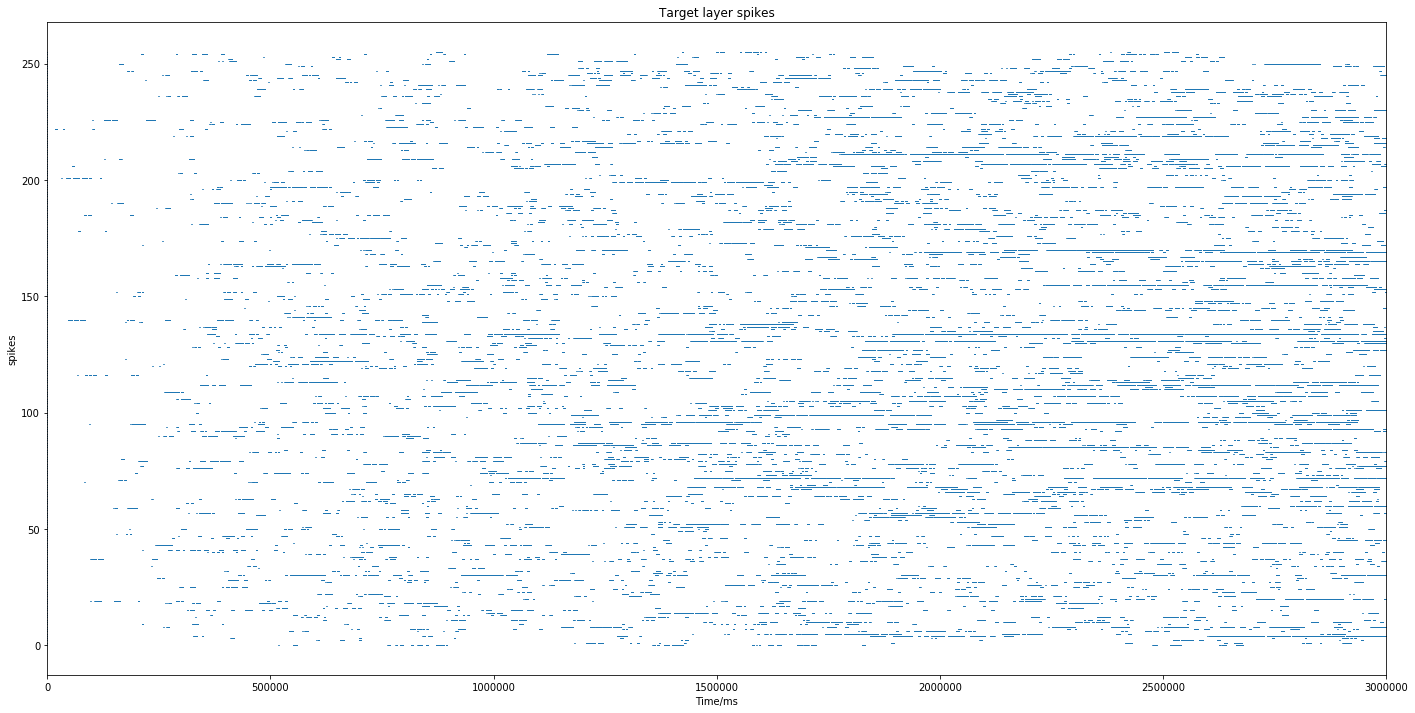

In [161]:
plot_spikes(post_spikes, "Target layer spikes")

In [ ]:
len(post_spikes)

579911

In [ ]:
plot_spikes(pre_spikes, "Source layer spikes")

In [ ]:
mean_rates = np.zeros(256)

In [ ]:
count_spikes = np.zeros(256)
for id, time in pre_spikes:
    count_spikes[id] += 1

In [ ]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(count_spikes.reshape(16,16))
ax1.grid(visible=False)
ax1.set_title("Spike counts for Poisson spike source", fontsize=16)
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Events", fontsize=16)

In [ ]:
mean_rates = count_spikes / float(simtime * msecond)

In [ ]:
np.average(mean_rates)

In [76]:


pre_weights= data['pre_weights']

post_weights= data['post_weights']

In [77]:
print pre_weights.shape
print pre_weights.size
print 
print post_weights.shape
print post_weights.size

print np.max(post_weights)

(1, 256, 256)
65536

(1, 256, 256)
65536
nan


In [78]:
init_ff_connections = data['init_ff_connections']
init_lat_connections = data['init_lat_connections']

In [79]:
init_ff_connections.shape

(256, 256)

In [80]:
pre_weights.shape

(1, 256, 256)

In [81]:
simdata = np.array(data['sim_params']).ravel()[0]

In [82]:
simdata

{'f_base': 5,
 'f_peak': 152,
 'g_max': 0.2,
 'sigma_stim': 2,
 'simtime': 40000,
 't_record': 40000,
 't_stim': 40000}

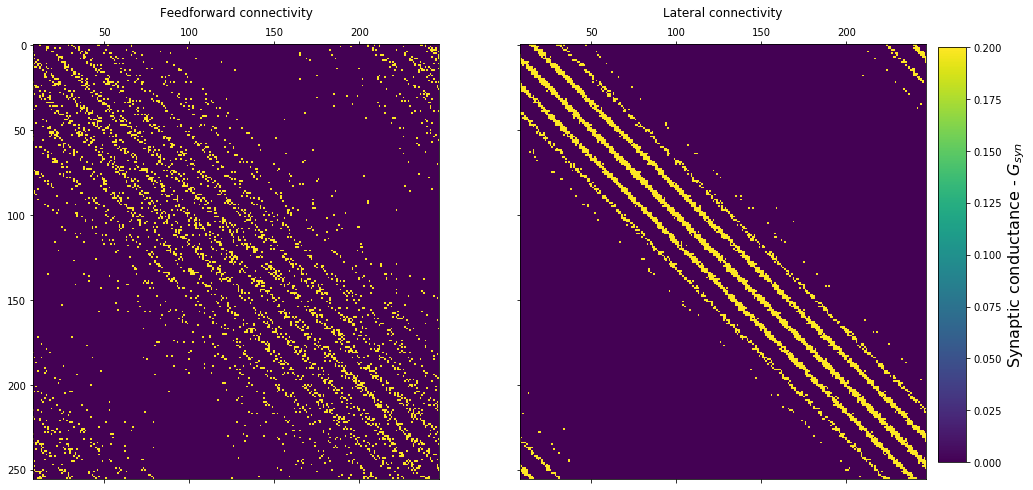

In [83]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ff_conn_ax = ax1.matshow(np.nan_to_num(init_ff_connections), vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(np.nan_to_num(init_lat_connections), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [84]:
def init_conn():
#     line.set_data(input_rates/Hz)
#     ff_conn_ax.set_data(np.zeros((16,16)))
    return (ff_conn_ax, lat_conn_ax)

def animate_conn(i):
    global ff_conn_image, lat_conn_image
    if i == 0:
        ff_conn_ax.set_data(np.nan_to_num(init_ff_connections))
        lat_conn_ax.set_data(np.nan_to_num(init_lat_connections))
    else:
        ff_conn_ax.set_data(np.nan_to_num(pre_weights[i-1].reshape(256,256)))
        lat_conn_ax.set_data(np.nan_to_num(post_weights[i-1].reshape(256,256)))
    return (ff_conn_ax, lat_conn_ax)

In [85]:
anim_conn = animation.FuncAnimation(fig_conn, animate_conn, init_func=init_conn,
                               frames= simdata['simtime']//simdata['t_record'], 
                            interval=200, blit=True)

In [527]:
HTML(anim_conn.to_html5_video())

In [530]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=24, metadata=dict(artist='Petrut A Bogdan'), bitrate=-1)
anim_conn.save('conn_evo.mp4', writer=writer)

In [86]:
simdata['simtime']

40000

In [87]:
simdata['t_record']

40000

In [88]:
pre_weights.shape

(1, 256, 256)

In [89]:
np.count_nonzero(np.nan_to_num(pre_weights[1, :, :]) -np.nan_to_num(pre_weights[0, :, :]))

IndexError: index 1 is out of bounds for axis 0 with size 1

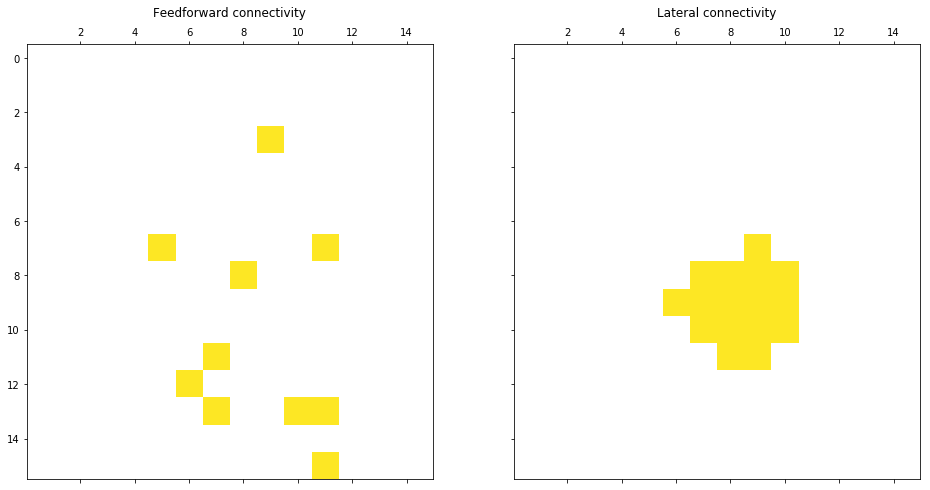

In [90]:
f_init, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ax1.matshow(init_ff_connections[8*19, :].reshape(16,16), vmin=0, vmax=.2)
ax2.matshow(init_lat_connections[8*19, :].reshape(16,16), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

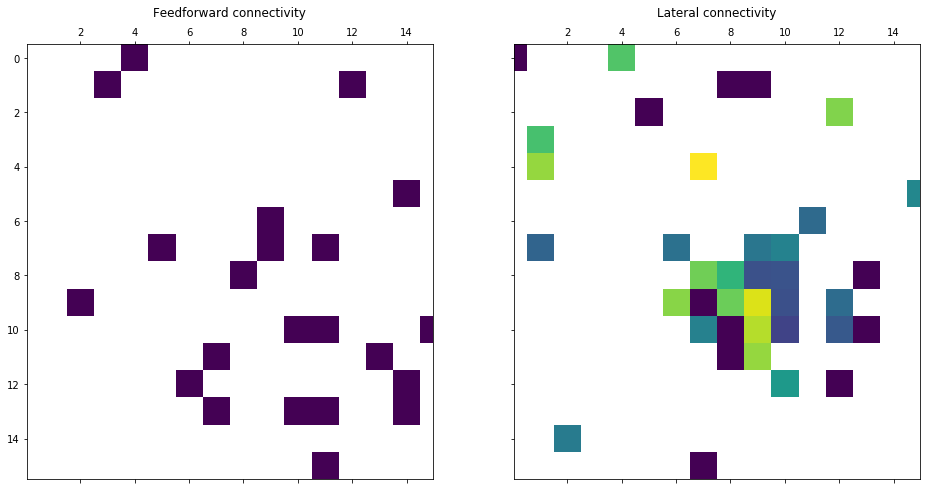

In [91]:
f_init, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ax1.matshow(pre_weights[-1].reshape(256,256)[8*19, :].reshape(16,16), vmin=0, vmax=.2)
ax2.matshow(post_weights[-1].reshape(256,256)[8*19, :].reshape(16,16), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [92]:
np.sum(np.isfinite(post_weights[-1].reshape(256, 256)[1, :]))

51

In [93]:
np.argwhere(np.isnan(post_weights[-1].reshape(256,256))).shape

(53327, 2)

In [94]:
np.argwhere(np.isnan(post_weights[0].reshape(256,256))).shape

(53327, 2)

In [95]:
np.argwhere(np.isnan(init_lat_connections.reshape(256,256))).shape

(61440, 2)

In [96]:
for entry in np.argwhere(np.isnan(init_lat_connections.reshape(256,256))):
    if post_weights[-1].reshape(256,256)[entry[0], entry[1]] is np.nan:
        print entry

In [97]:
num_syn_during_runtime = []
for i in range(len(post_weights)):
    num_syn_during_runtime.append(np.argwhere(np.isnan(post_weights[-1].reshape(256,256))).shape[0])

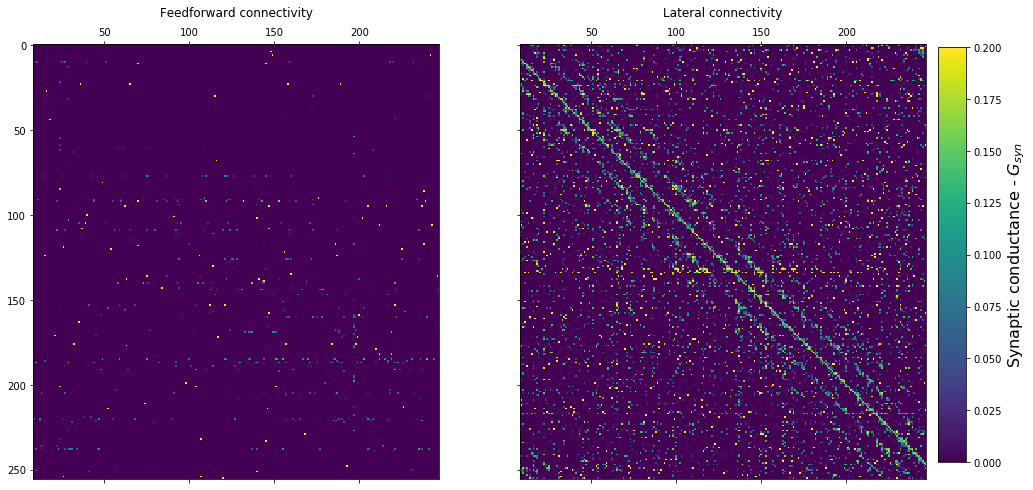

In [98]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)

ff_conn_ax = ax1.matshow(np.nan_to_num(np.nan_to_num(pre_weights[-1].reshape(256,256))), vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(np.nan_to_num(np.nan_to_num(post_weights[-1].reshape(256,256))), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [99]:
diff_lat = post_weights[-1].reshape(256,256) - init_lat_connections.reshape(256, 256)

In [100]:
for pos in np.argwhere(np.isnan(diff_lat)):
    if np.isnan(post_weights[-1].reshape(256,256)[pos])[0]:
        print pos

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

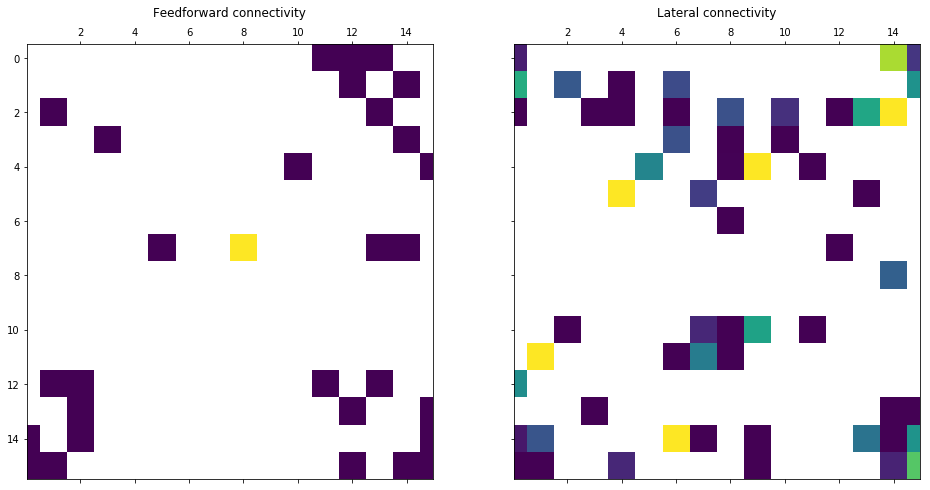

In [101]:
f_init, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ax1.matshow(pre_weights[-1].reshape(256,256)[255, :].reshape(16,16), vmin=0, vmax=.2)
ax2.matshow(post_weights[-1].reshape(256,256)[255, :].reshape(16,16), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

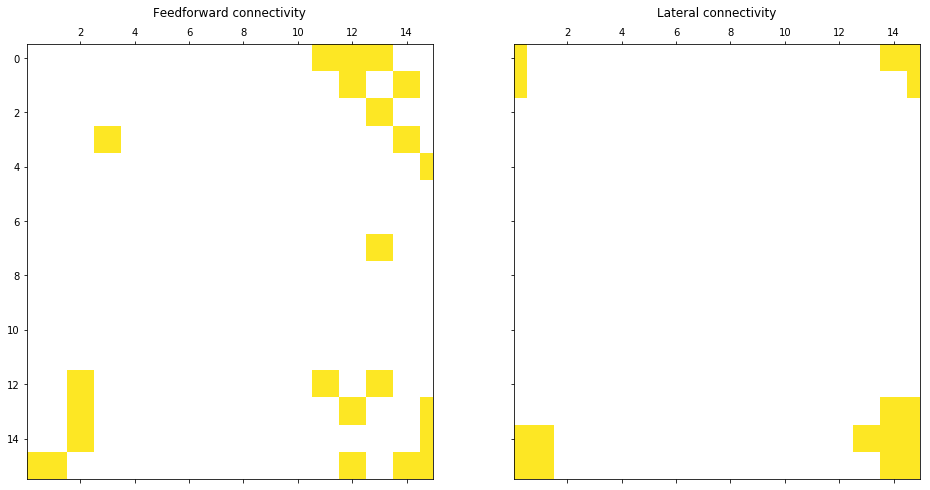

In [102]:
f_init, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ax1.matshow(init_ff_connections[255, :].reshape(16,16), vmin=0, vmax=.2)
ax2.matshow(init_lat_connections[255, :].reshape(16,16), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

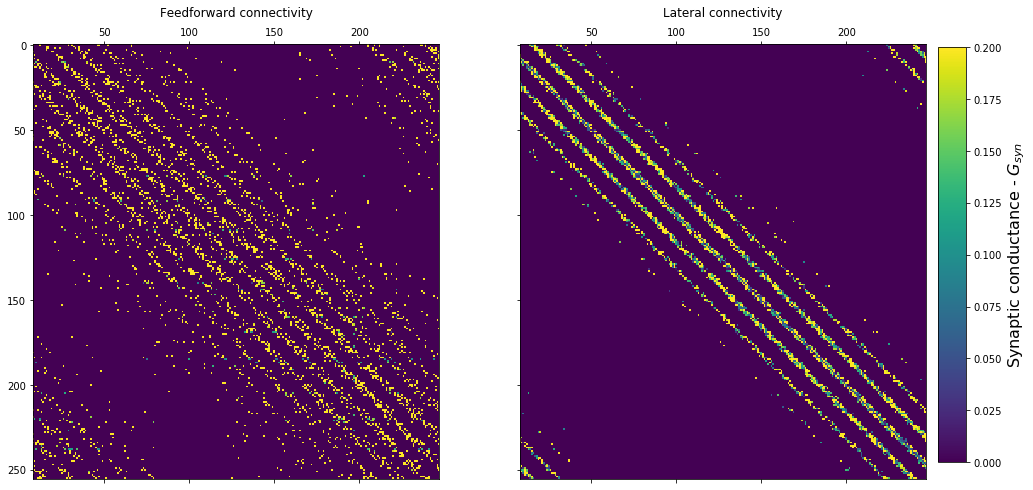

In [103]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ff_conn_ax = ax1.matshow(np.nan_to_num(init_ff_connections) - np.nan_to_num(pre_weights[-1].reshape(256,256)), vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(np.nan_to_num(init_lat_connections) - np.nan_to_num(post_weights[-1].reshape(256,256)), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

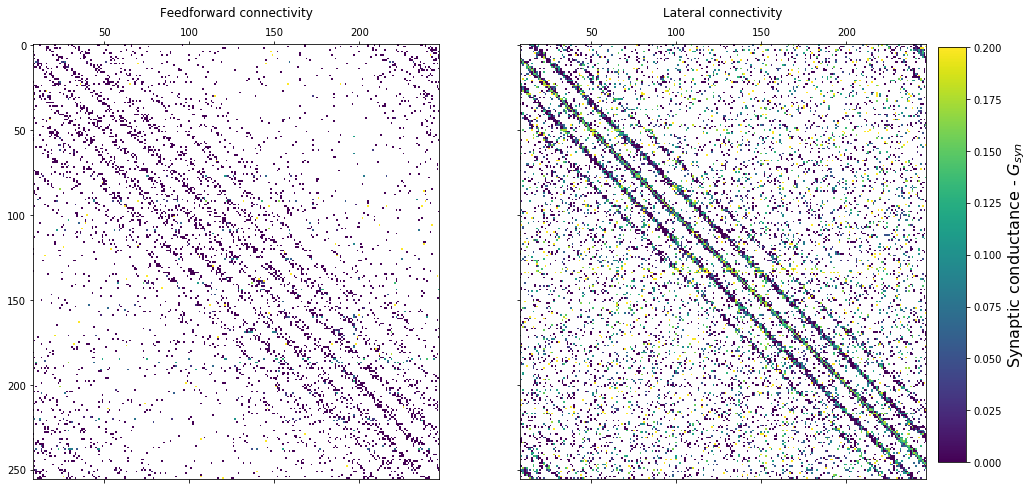

In [126]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ff_conn_ax = ax1.matshow(pre_weights[-1].reshape(256,256), vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(post_weights[-1].reshape(256,256), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [134]:
s_max = 32

In [135]:
ff_last = pre_weights[-1].reshape(256,256)
lat_last = post_weights[-1].reshape(256,256)

In [136]:
ff_count = np.count_nonzero(~np.isnan(ff_last), axis=1)
lat_count = np.count_nonzero(~np.isnan(lat_last), axis=1)

In [137]:
ff_last.shape

(256, 256)

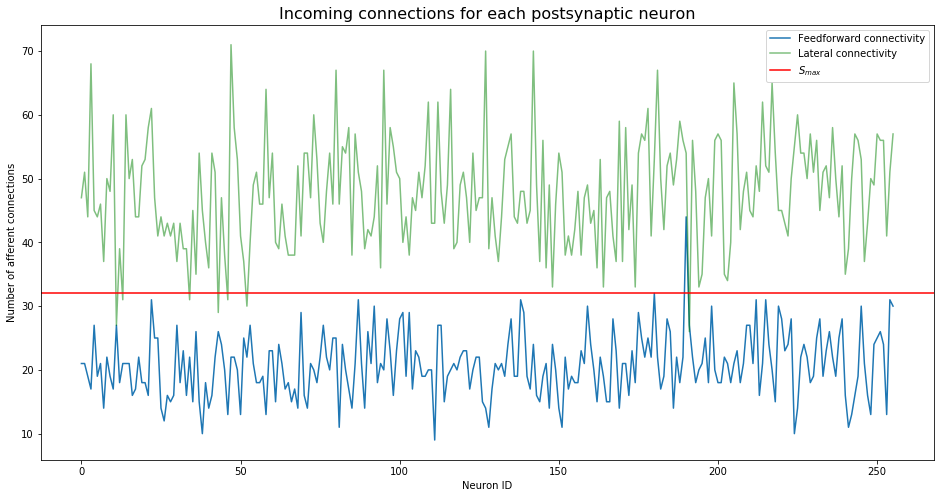

In [146]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(range(ff_last.shape[1]), ff_count, label='Feedforward connectivity')
ax1.plot(range(lat_last.shape[1]), lat_count, c='g', alpha=.5, label='Lateral connectivity')
ax1.grid(visible=False)
ax1.set_title("Incoming connections for each postsynaptic neuron", fontsize=16)
ax1.axhline(y=s_max, xmin=0, xmax=ff_last.shape[1], c='r', label='$S_{max}$')
ax1.legend(loc='best')
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of afferent connections")
# cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# cbar = f.colorbar(i, cax=cbar_ax)
# cbar.set_label("Events", fontsize=16)

In [139]:
ff_count_efferent = np.count_nonzero(~np.isnan(ff_last), axis=0)
lat_count_efferent = np.count_nonzero(~np.isnan(lat_last), axis=0)

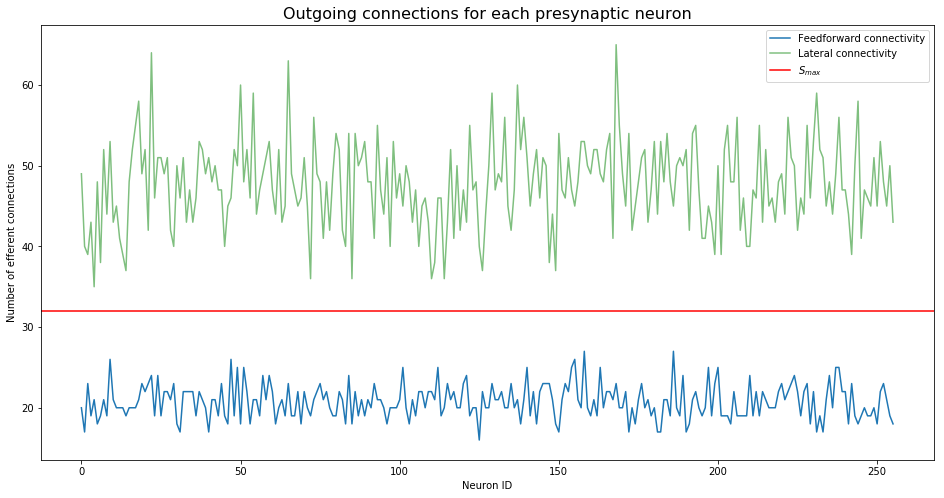

In [145]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(range(ff_last.shape[1]), ff_count_efferent, label='Feedforward connectivity')
ax1.plot(range(lat_last.shape[1]), lat_count_efferent, c='g', alpha=.5, label='Lateral connectivity')
ax1.grid(visible=False)
ax1.set_title("Outgoing connections for each presynaptic neuron", fontsize=16)
ax1.axhline(y=s_max, xmin=0, xmax=ff_last.shape[1], c='r', label='$S_{max}$')
ax1.legend(loc='best')
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of efferent connections")

In [147]:
init_ff_count = np.count_nonzero(~np.isnan(init_ff_connections), axis=1)
init_lat_count = np.count_nonzero(~np.isnan(init_lat_connections), axis=1)

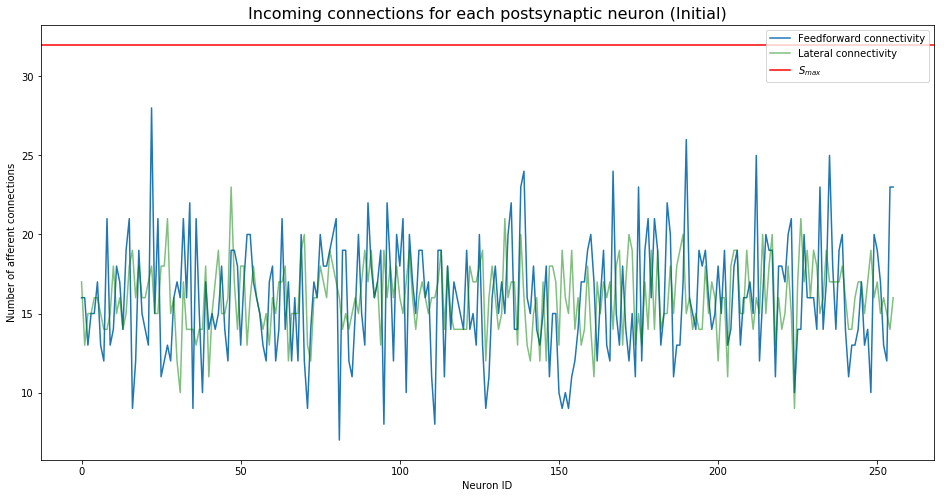

In [151]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(range(init_ff_connections.shape[1]), init_ff_count, label='Feedforward connectivity')
ax1.plot(range(init_lat_connections.shape[1]), init_lat_count, c='g', alpha=.5, label='Lateral connectivity')
ax1.grid(visible=False)
ax1.set_title("Incoming connections for each postsynaptic neuron (Initial)", fontsize=16)
ax1.axhline(y=s_max, xmin=0, xmax=init_ff_count.shape[0], c='r', label='$S_{max}$')
ax1.legend(loc='best')
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of afferent connections")

In [152]:
init_ff_count_out = np.count_nonzero(~np.isnan(init_ff_connections), axis=0)
init_lat_count_out = np.count_nonzero(~np.isnan(init_lat_connections), axis=0)

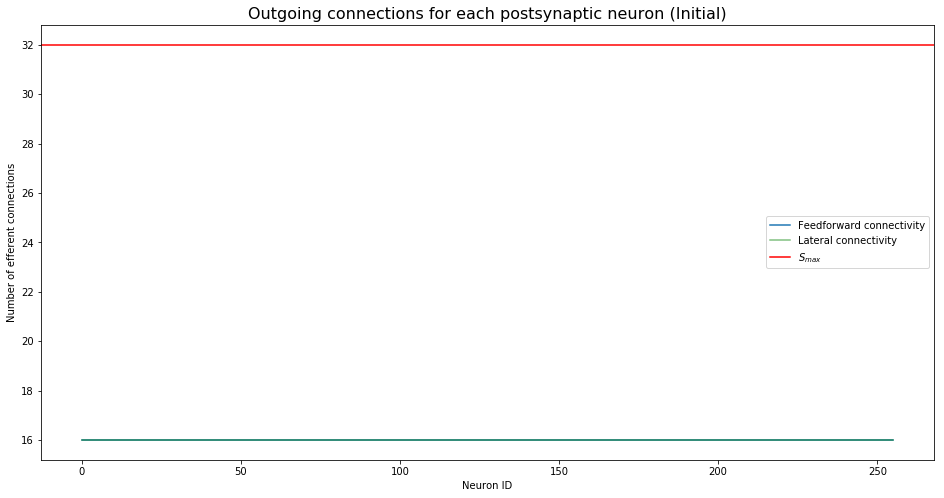

In [154]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(range(ff_last.shape[1]), init_ff_count_out, label='Feedforward connectivity')
ax1.plot(range(lat_last.shape[1]), init_lat_count_out, c='g', alpha=.5, label='Lateral connectivity')
ax1.grid(visible=False)
ax1.set_title("Outgoing connections for each postsynaptic neuron (Initial)", fontsize=16)
ax1.axhline(y=s_max, xmin=0, xmax=init_ff_count.shape[0], c='r', label='$S_{max}$')
ax1.legend(loc='best')
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of efferent connections")